# Ejercicio 1 - practica

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parametros

In [14]:
# Ejercicio 1: Simulación de un sistema de retardo de primer orden
dt = 1                # Paso de tiempo (Δt) en días
T = 50                # Tiempo total de simulación (días)
tau = 5               # Retraso en días
entrada1 = 10         # Entrada constante inicial (unidades/día)
entrada2 = 20         # Entrada después del cambio (unidades/día)
t_cambio = 25         # Día en que cambia la entrada


n = int(T/dt) + 1              # Número de pasos de simulación
t = np.arange(0, T+dt, dt)     # Vector de tiempo
stock = np.zeros(n)            # Stock (nivel)
salida = np.zeros(n)           # Salida (flujo)


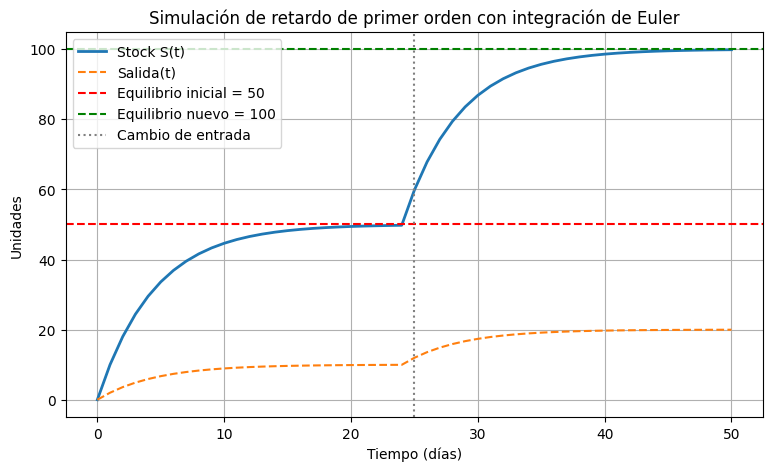

In [15]:
for i in range(1, n):
    # Entrada cambia en el día 25
    entrada = entrada1 if t[i] < t_cambio else entrada2

    # Salida proporcional al stock
    salida[i-1] = stock[i-1] / tau

    # Cambio en el stock
    dS = (entrada - salida[i-1]) * dt
    stock[i] = stock[i-1] + dS

# Última salida
salida[-1] = stock[-1] / tau

# Calcular los valores de equilibrio
Seq1 = entrada1 * tau
Seq2 = entrada2 * tau

plt.figure(figsize=(9,5))
plt.plot(t, stock, label="Stock S(t)", linewidth=2)
plt.plot(t, salida, label="Salida(t)", linestyle='--')
plt.axhline(Seq1, color='red', linestyle='--', label=f"Equilibrio inicial = {Seq1}")
plt.axhline(Seq2, color='green', linestyle='--', label=f"Equilibrio nuevo = {Seq2}")
plt.axvline(t_cambio, color='gray', linestyle=':', label="Cambio de entrada")
plt.xlabel("Tiempo (días)")
plt.ylabel("Unidades")
plt.title("Simulación de retardo de primer orden con integración de Euler")
plt.legend()
plt.grid(True)
plt.show()

# Grafico ejercicio 6

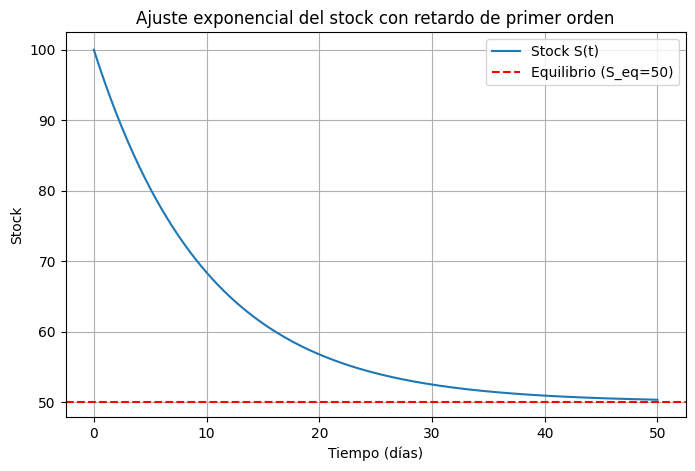

In [16]:
# Parámetros del problema
S0 = 100      # Stock inicial
Se = 50       # Stock en equilibrio
tau = 10      # Tiempo de retardo
t = np.linspace(0, 50, 200)  # Tiempo de 0 a 50 días

# Ecuación analítica del retardo de primer orden
S = Se + (S0 - Se) * np.exp(-t/tau)

# Graficar
plt.figure(figsize=(8,5))
plt.plot(t, S, label="Stock S(t)")
plt.axhline(Se, color='red', linestyle='--', label="Equilibrio (S_eq=50)")
plt.xlabel("Tiempo (días)")
plt.ylabel("Stock")
plt.title("Ajuste exponencial del stock con retardo de primer orden")
plt.legend()
plt.grid(True)
plt.show()

# Ejercicio 2 - Práctica

# Parametros

In [3]:
T          = 200          # días de simulación
dt         = 0.1          # paso de integración (Euler)
n_steps    = int(T/dt)
k          = 5            # orden del retraso de Erlang → 15 días = k·τ
tau        = 15/k         # tiempo de cada etapa Erlang
objetivo   = 50           # valor meta
ruido      = 0.0          # cambiar a >0 para opcional

# Incializacion

In [4]:
real        = np.zeros(n_steps)      # stock real
perceived   = np.zeros(n_steps)      # stock percibido
erlang      = np.zeros(k)            # etapas internas del retraso
real[0]     = 0                      # condición inicial

# Simulacion de Euler

In [5]:
for t in range(1, n_steps):
    # 1) Flujo de ajuste basado en el **percibido**
    adjustment = (objetivo - perceived[t-1]) / 15   # 15 días = k·τ

    # 2) Actualizar stock real
    real[t] = real[t-1] + adjustment * dt

    # 3) Retardo de Erlang
    inflow = real[t] + np.random.normal(0, ruido)    # ruido opcional
    erlang[0] = inflow
    for i in range(k-1):
        erlang[i+1] += (erlang[i] - erlang[i+1]) * dt / tau
    perceived[t] = erlang[-1]                         # salida del retraso

# Grafico de comparacion entre simulacion y objetivo real

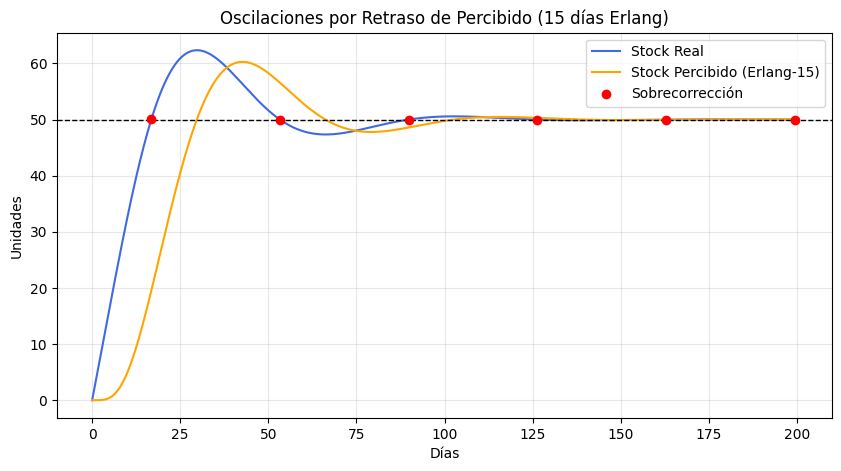

In [6]:
time = np.arange(n_steps)*dt

plt.figure(figsize=(10,5))
plt.plot(time, real, label='Stock Real', color='royalblue')
plt.plot(time, perceived, label='Stock Percibido (Erlang-15)', color='orange')

# Resaltar sobrecorrecciones (cuando la curva cruza el objetivo)
sobre = (real[:-1] - objetivo)*(real[1:] - objetivo) < 0
plt.scatter(time[1:][sobre], real[1:][sobre], color='red', zorder=5, label='Sobrecorrección')

plt.axhline(objetivo, ls='--', c='black', lw=1)
plt.title('Oscilaciones por Retraso de Percibido (15 días Erlang)')
plt.xlabel('Días')
plt.ylabel('Unidades')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Ejercicio 3 - practica

In [7]:
# Parámetros fijos
β, μ    = 0.3, 0.1        # /día
N       = 1000            # población total
dt      = 0.1             # paso Euler
days    = 100
steps   = int(days / dt)

# Arrays
S = np.zeros(steps)
I = np.zeros(steps)
R = np.zeros(steps)

# Condiciones iniciales
S[0], I[0], R[0] = 990, 10, 0

# Euler sin vacunacion

In [8]:
for t in range(1, steps):
    dS = -β * S[t-1] * I[t-1] / N * dt
    dI = (β * S[t-1] * I[t-1] / N - μ * I[t-1]) * dt
    dR = μ * I[t-1] * dt

    S[t] = S[t-1] + dS
    I[t] = I[t-1] + dI
    R[t] = R[t-1] + dR

# Representacion grafica sin la vacuna

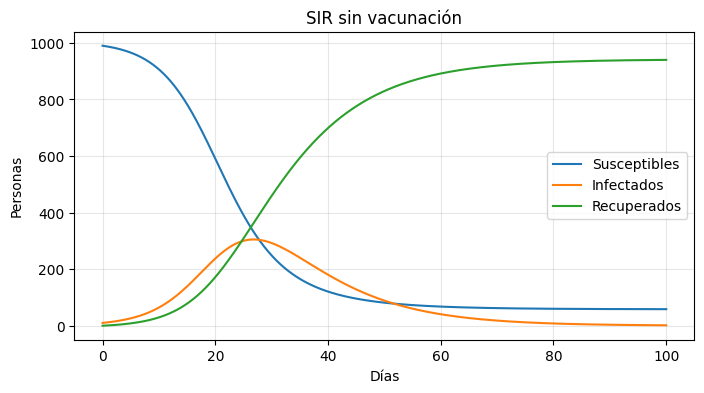

In [9]:
t = np.linspace(0, days, steps)
plt.figure(figsize=(8,4))
plt.plot(t, S, label='Susceptibles')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.title('SIR sin vacunación')
plt.xlabel('Días'); plt.ylabel('Personas')
plt.legend(); plt.grid(alpha=.3)
plt.show()

# Vacunacion en dia 30

In [12]:
# Copiar arrays para comparar
Sv, Iv, Rv = S.copy(), I.copy(), R.copy()

vacc_day   = int(30 / dt)
vacc_rate  = 0.5                    # 50 % de S se vacunan instantáneamente

Sv[vacc_day] *= (1 - vacc_rate)     # reducir susceptibles
Rv[vacc_day] += Sv[vacc_day] * vacc_rate  # añadir a recuperados/vacunados

# Grafico de comparacion entre vacunacion y sin vacunacion

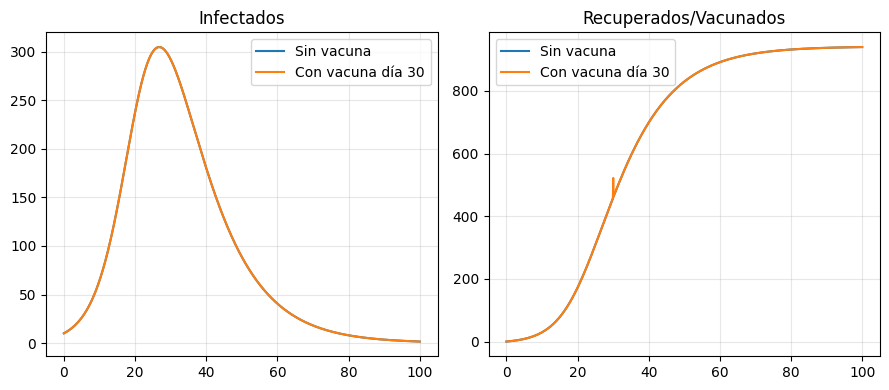

In [11]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.plot(t, I, label='Sin vacuna')
plt.plot(t, Iv, label='Con vacuna día 30')
plt.title('Infectados'); plt.legend(); plt.grid(alpha=.3)

plt.subplot(1,2,2)
plt.plot(t, R, label='Sin vacuna')
plt.plot(t, Rv, label='Con vacuna día 30')
plt.title('Recuperados/Vacunados'); plt.legend(); plt.grid(alpha=.3)
plt.tight_layout(); plt.show()

# Prompt utilizado en Kimi 2

Explicación y simulación de oscilaciones en sistemas dinámicos causadas por retrasos de percepción (termostato) y dinámica no-lineal (modelo SIR). Incluye:  
- analogía del retraso de Erlang de 15 días en la retroalimentación;  
- derivación del umbral de inmunidad p_c = 1-1/R₀ con R₀ = 3;  
- implementación completa en Python (numpy/matplotlib) de SIR con S₀=990, I₀=10, R₀=0, β=0.3 d⁻¹, μ=0.1 d⁻¹; visualización de curvas S, I, R y efecto de vacunar el 50 % el día 30;  
- breve comparativa sistemas lineales vs no lineales y justificación de la necesidad de simulación numérica.